In [2]:
# Homicide data analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
df=pd.read_csv(r'C:\Users\david\Desktop\Curso ML\Pandas\homicide_by_countries.csv')

In [8]:
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [10]:
df.shape

(195, 6)

In [12]:
df.describe()

,Rate,Count,Year
count,195.000000,195.000000,195.000000
mean,6.845128,1942.800000,2017.420513
std,9.600060,6553.343376,3.589445
min,0.000000,0.000000,2006.000000
25%,1.100000,28.000000,2016.000000
50%,2.600000,128.000000,2019.000000
75%,7.850000,785.000000,2020.000000
max,49.300000,47722.000000,2021.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   195 non-null    object 
 1   Region     195 non-null    object 
 2   Subregion  195 non-null    object 
 3   Rate       195 non-null    float64
 4   Count      195 non-null    int64  
 5   Year       195 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ KB


In [16]:
df.isnull().sum()
# df.dropna(inplace=True) / df.dropna(subset=['Subregion'],inplace=True)
# df['count']=df['count'].fillna(df['count'].mean())

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [18]:
# cambiamos data type
df['Rate']=df['Rate'].astype(int)

In [20]:
df.dtypes # observamos el cambio

Location     object
Region       object
Subregion    object
Rate          int32
Count         int64
Year          int64
dtype: object

In [22]:
# podemos cambiar el data type de varias columnas
my_list=['Rate','Count','Year']
for i in my_list:
    df[i]=df[i].astype(int)

In [25]:
# ordenamos segun rate
df1=df.sort_values('Count',ascending=False).reset_index(drop=True)
df1

,Location,Region,Subregion,Rate,Count,Year
0,Brazil,Americas,South America,22,47722,2020
1,Nigeria,Africa,Western Africa,22,44200,2019
2,India,Asia,Southern Asia,3,40651,2020
3,Mexico,Americas,Central America,28,36579,2020
4,United States,Americas,Northern America,6,21570,2020
...,...,...,...,...,...,...
190,Holy See,Europe,Southern Europe,0,0,2015
191,Channel Islands,Europe,Northern Europe,0,0,2010
192,Saint Helena,Africa,Western Africa,0,0,2009
193,San Marino,Europe,Southern Europe,0,0,2011


In [27]:
df1=df[['Location','Count']].sort_values(by='Count', ascending=False).head(5)
df1

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570


In [29]:
# podemos determinar el porcentaje que corresponde a cada pais
df1['Perc'] = (df1['Count'] * 100 / df1['Count'].sum()).round(2)
df1

,Location,Count,Perc
26,Brazil,47722,25.02
125,Nigeria,44200,23.18
78,India,40651,21.31
111,Mexico,36579,19.18
186,United States,21570,11.31


In [31]:
lista_count=df1['Count'].values
print(lista_count)
lista_count.shape
lista_location=df1['Location'].values
print(lista_location)
lista_location.shape

[47722 44200 40651 36579 21570]
['Brazil' 'Nigeria' 'India' 'Mexico' 'United States']


(5,)

([<matplotlib.patches.Wedge at 0x2a000aa2ff0>,
 [Text(0.7772855857560038, 0.7783489694063623, 'Brazil'),
  Text(-0.7330926395547633, 0.8201068112329211, 'Nigeria'),
  Text(-0.9341290165099868, -0.580863994850847, 'India'),
  Text(0.28029670467334616, -1.0636887502221988, 'Mexico'),
  Text(1.0312950913201755, -0.3826622984027965, 'United States')],
 [Text(0.4239739558669111, 0.4245539833125613, '25.0%'),
  Text(-0.3998687124844163, 0.44733098794522963, '23.2%'),
  Text(-0.5095249180963564, -0.31683490628228017, '21.3%'),
  Text(0.15288911164000699, -0.5801938637575629, '19.2%'),
  Text(0.5625245952655502, -0.20872489003788897, '11.3%')])

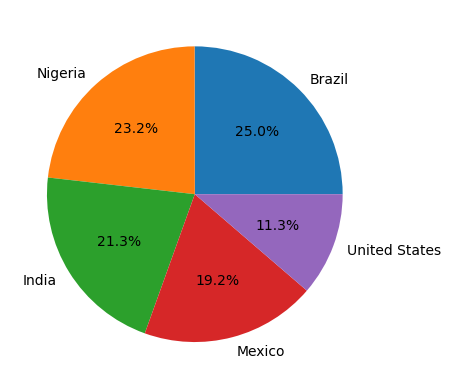

In [33]:
plt.pie(lista_count,labels=lista_location,autopct='%1.1f%%')

<Axes: ylabel='Count'>

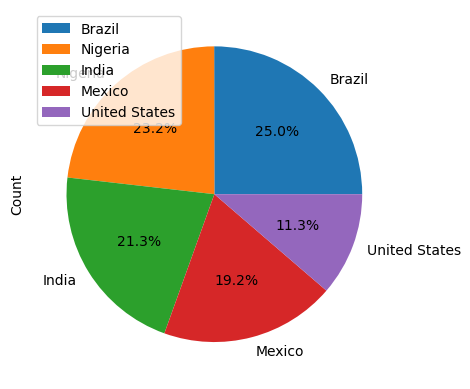

In [35]:
# otra forma
df1.plot(x='Location',y='Count',kind='pie', labels=lista_location, autopct='%1.1f%%')

In [37]:
# agurpamos por region y calculamos la suma
df2=df.groupby('Region')['Count'].sum().sort_values(ascending=False)
df2

Region
Americas    153597
Asia        105552
Africa       99481
Europe       19869
Oceania        347
Name: Count, dtype: int32

<Axes: xlabel='Region'>

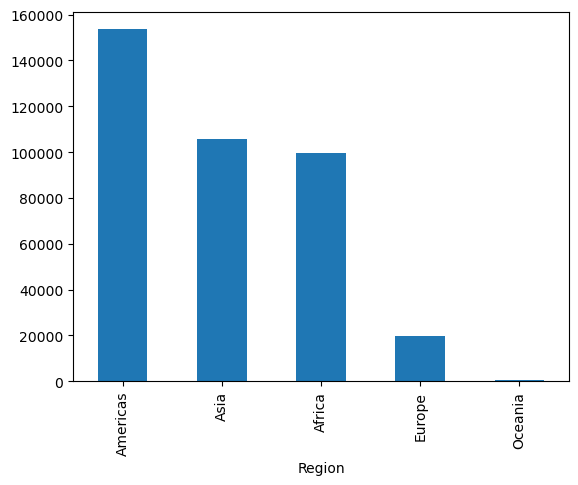

In [39]:
df2.plot(kind='bar')

In [41]:
df3=df.groupby('Subregion')['Count'].sum().sort_values(ascending=False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int32

In [43]:
print(df3.index)
print(df3.values)

Index(['South America', 'Southern Asia', 'Central America', 'Western Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Southern Africa', 'Eastern Europe', 'Western Asia', 'Eastern Asia',
       'Northern Africa', 'Caribbean', 'Middle Africa', 'Northern Europe',
       'Western Europe', 'Central Asia', 'Southern Europe',
       'Australia, New Zealand'],
      dtype='object', name='Subregion')
[78872 58631 47371 46318 25314 23669 22317 21479 14604 11638  8563  5538
  5037  2477  2097  2075  1406  1093   347]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'South America'),
  Text(1, 0, 'Southern Asia'),
  Text(2, 0, 'Central America'),
  Text(3, 0, 'Western Africa'),
  Text(4, 0, 'South-Eastern Asia'),
  Text(5, 0, 'Eastern Africa'),
  Text(6, 0, 'Northern America'),
  Text(7, 0, 'Southern Africa'),
  Text(8, 0, 'Eastern Europe'),
  Text(9, 0, 'Western Asia'),
  Text(10, 0, 'Eastern Asia'),
  Text(11, 0, 'Northern Africa'),
  Text(12, 0, 'Caribbean'),
  Text(13, 0, 'Middle Africa'),
  Text(14, 0, 'Northern Europe'),
  Text(15, 0, 'Western Europe'),
  Text(16, 0, 'Central Asia'),
  Text(17, 0, 'Southern Europe'),
  Text(18, 0, 'Australia, New Zealand')])

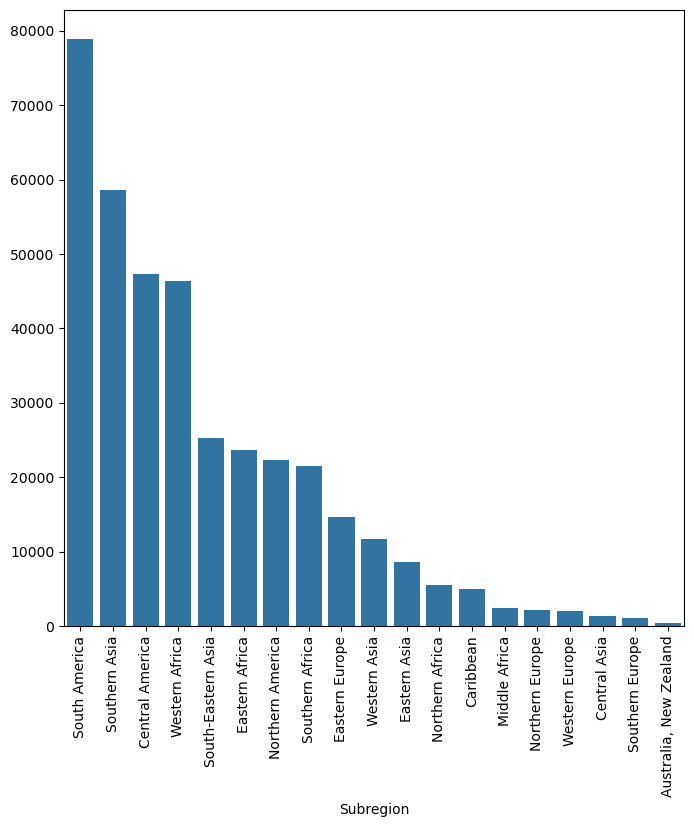

In [45]:
plt.figure(figsize=(8,8))
sns.barplot(x=df3.index, y=df3.values)
plt.xticks(rotation=90)

In [47]:
df['Year'].value_counts()

Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

In [49]:
# isin
df4=df.loc[df['Region'].isin(['Asia','Europe'])] # df.loc[(df['Region']=='Asia') | (df['Region']=='Europe')]

In [55]:
df4=df4.loc[df['Year']>2016][['Region', 'Year', 'Count']]
df4

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
...,...,...,...
178,Asia,2020,2095
182,Europe,2017,2751
183,Asia,2019,64
184,Europe,2018,755


In [57]:
df4=df4.groupby(['Region','Year']).sum()['Count']
df4

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int32

In [59]:
# lo graficamos
df_unstacked=df4.unstack(level=0) # cuando tengo multi indices
df_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [65]:
# necesitamos convertir los datos del index a fechas
df_unstacked.index # observamos como son valores enteros

Index([2017, 2018, 2019, 2020, 2021], dtype='int32', name='Year')

In [67]:
df_unstacked.index=df_unstacked.index.astype(str)

In [69]:
df_unstacked.index 

Index(['2017', '2018', '2019', '2020', '2021'], dtype='object', name='Year')

Text(0.5, 1.0, 'Count of Asia and Europe over years')

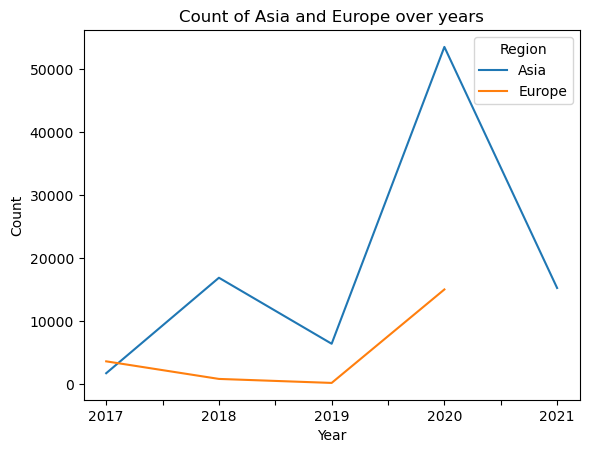

In [73]:
df_unstacked.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Asia and Europe over years')

In [80]:
df5=df.groupby(['Year'])['Rate'].sum().sort_values(ascending=False)

<Axes: xlabel='Year'>

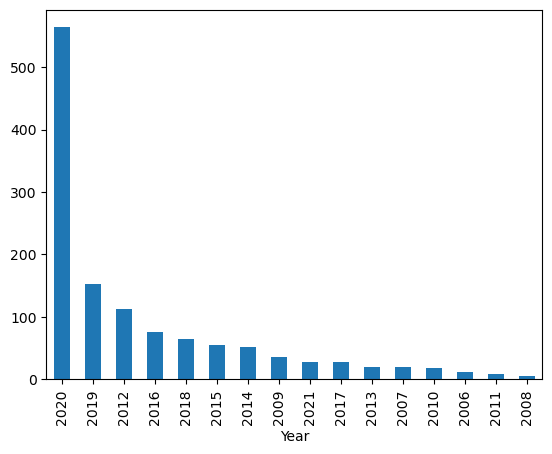

In [82]:
df5.plot(kind='bar')

In [104]:
df6=df[['Year','Region','Count']]

In [108]:
df6=df6.groupby(['Year','Region']).sum().sort_values(by='Year',ascending=False).head(40)
df6

Count
Year Region          
2021 Asia       15299
2020 Oceania      221
     Europe     15066
     Asia       53516
     Americas  134784
     Africa     28460
2019 Asia        6458
     Africa     44210
     Americas    4276
     Europe       249
     Oceania      126
2018 Europe       883
     Asia       16923
     Americas   13793
2017 Europe      3670
     Asia        1787
     Africa      1467
2016 Americas     608
     Europe         0
     Asia         627
     Africa      4987
2015 Asia         241
     Africa      2206
     Europe         0
2014 Asia        3029
     Americas      13
2013 Asia        5782
2012 Africa     15264
     Asia          61
     Americas      53
2011 Asia        1626
     Africa       855
     Europe         0
2010 Europe         1
     Africa       303
2009 Americas      42
     Africa        27
2008 Africa      1702
2007 Americas      26
2006 Asia         203

<Axes: xlabel='Year,Region'>

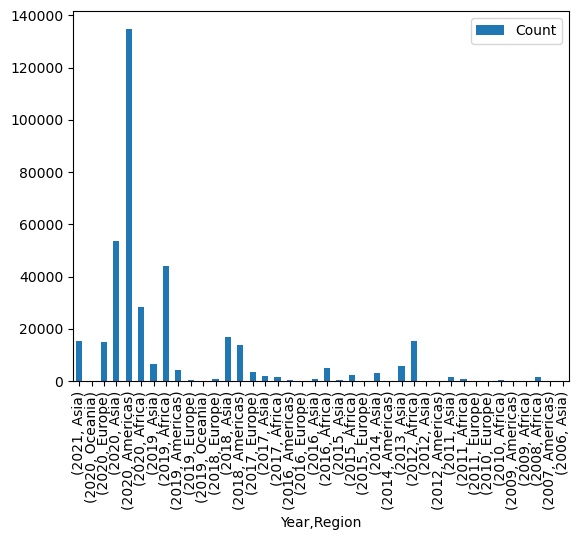

In [110]:
df6.plot(kind='bar')

In [126]:
df7=df.groupby(['Subregion'])['Count'].mean().sort_values(ascending=False).round(2)

In [128]:
df7.index

Index(['Southern Asia', 'South America', 'Central America', 'Northern America',
       'Southern Africa', 'Western Africa', 'South-Eastern Asia',
       'Eastern Africa', 'Eastern Europe', 'Eastern Asia', 'Northern Africa',
       'Middle Africa', 'Western Asia', 'Central Asia', 'Western Europe',
       'Caribbean', 'Australia, New Zealand', 'Northern Europe',
       'Southern Europe'],
      dtype='object', name='Subregion')

In [130]:
df7.values

array([6514.56, 6067.08, 5921.38, 4463.4 , 4295.8 , 4210.73, 2531.4 ,
       1577.93, 1460.4 , 1223.29, 1107.6 ,  619.25,  581.9 ,  281.2 ,
        230.56,  201.48,  173.5 ,  139.8 ,   64.29])

In [132]:
# creamos nuevo df con estos resultados
data={
    'Category':df7.index,
    'Value':df7.values,
    'Info':df7.values
}

df8=pd.DataFrame(data)
df8

,Category,Value,Info
0,Southern Asia,6514.56,6514.56
1,South America,6067.08,6067.08
2,Central America,5921.38,5921.38
3,Northern America,4463.40,4463.40
4,Southern Africa,4295.80,4295.80
5,Western Africa,4210.73,4210.73
6,South-Eastern Asia,2531.40,2531.40
7,Eastern Africa,1577.93,1577.93
8,Eastern Europe,1460.40,1460.40
9,Eastern Asia,1223.29,1223.29


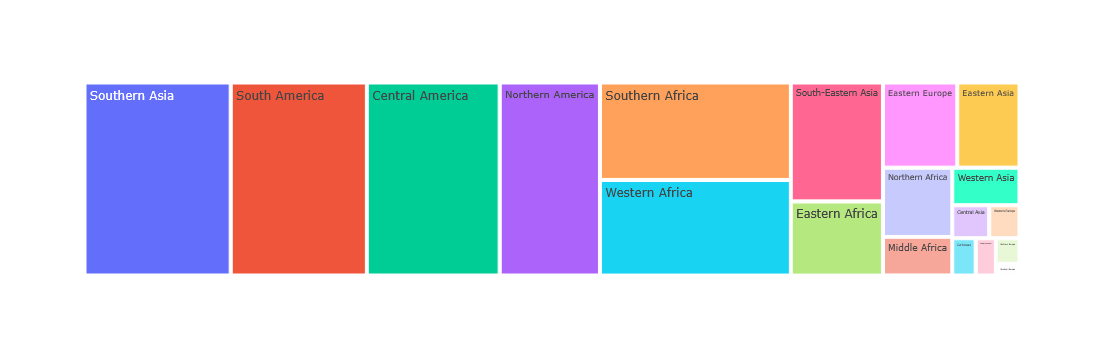

In [140]:
fig=px.treemap(df8, path=['Category'], values='Value')
fig.show()